In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv("Mall_Customers.csv")
df.drop_duplicates(inplace=True)
X = df.iloc[:, [3, 4]].values

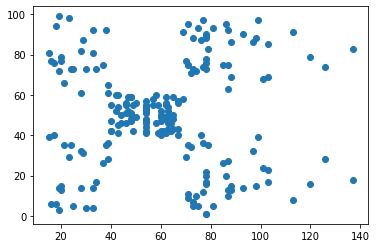

In [3]:
plt.scatter(X[:,0],X[:,1])

In [4]:
def ecart_abs_moyen(data):
    ecart_absolue_moyen=np.array((1,data.shape[0]))
    mean=np.mean(data,axis=0)
    for i in range(data.shape[1]):
        temp=data[:,i]-mean[i]
        temp=np.absolute(temp)
        sum=temp.sum()
        ecart_absolue_moyen[i]=sum/data.shape[0]
    return ecart_absolue_moyen


def normalize(data):
    mean=np.mean(data,axis=0)
    variance=ecart_abs_moyen(data)
    normalized=data-mean
    normalized=normalized/variance
    return normalized

def euclidian_distance(X1,X2):
    temp=X1-X2
    temp=np.square(temp)
    return np.sqrt(temp.sum()/len(temp))

In [5]:
class kmeans:
    
    def __init__(self, X,k=3,max_iterations=100):
        
        self.X= X
        self.k = k
        self.max_iterations = max_iterations
        
        self.clusters= []
        #choose random tuples from our data
        idx = np.random.choice(len(self.X), k, replace=False)
        self.centroids = self.X[idx, :]



    def random(self,ds, k, random_state=42):

        np.random.seed(random_state)
        centroids = []
        m = ds.shape[0]

        for _ in range(k):
            r = np.random.randint(0, m-1)
            centroids.append(ds[r])

        return np.array(centroids)


    def train(self,data):
        data=normalize(data)
        #randomly initialize clusters nad centroids
        centroids = self.random(data,self.k)
        #euclidian distance between data and centroids
        ls_dist = self.calculate_dist(data, centroids)
        old=centroids.copy()
        #associate data with closest centroid
        clusters = np.argmin(ls_dist, axis=1)
        for _ in range(self.max_iterations):
            #calculate new centroids
            a =[self.cal_mean(data[clusters==i]) for i in range(self.k)]
            centroids = np.vstack(a)
            # quit if algorithm has converged 
            if self.is_converged(old):break
            old = self.centroids.copy()
            #calculate new distances with new centroids
            ls_dist = self.calculate_dist(data, centroids)
            #find new clusters
            tmp = np.argmin(ls_dist, axis=1)
            if np.array_equal(clusters,tmp):break
            clusters = tmp

        return centroids, clusters

    def inertia(self,data):
        '''
        Inertia of our algorithm
        It is the sum of the distance of each data tuple with the centroid of its cluster
        '''
        inertia=0
        for i in range(self.k):
            temp=data[self.clusters==i]
            for row in temp:
                inertia+=euclidian_distance(row,self.centroids[i])**2
        return inertia

    def predict(self):
        #execute kmeans
        self.centroids, self.clusters = self.train(self.X)

        return self.clusters
    
            

    def is_converged(self, centroids_old):
        #check if the last iteration changed anything
        cnvg =  centroids_old != self.centroids
        return cnvg.sum() <= 0.01
    
    def calculate_dist(self,data,centroids):
        ls_dist = np.empty((data.shape[0], centroids.shape[0]))
        # loop through all the centroids and get the euclidean distance between centroids and data instances 
        for idx, centroid in enumerate(centroids):
            for idx2, x in enumerate(data):
                ls_dist[idx2,idx]=euclidian_distance(x,centroid)
            
        return ls_dist

    def cal_mean(self, X_tuples):
        array_mean = np.mean(X_tuples, axis=0)
        return array_mean

In [6]:
'''
In this step we calculate the inertia for each number of clusters ranging between 1 and 9
'''
inertia=[]
x_k=np.arange(1,9)
for i in x_k:
    P=kmeans(X,i)
    P.predict()
    inertia.append(P.inertia(X))


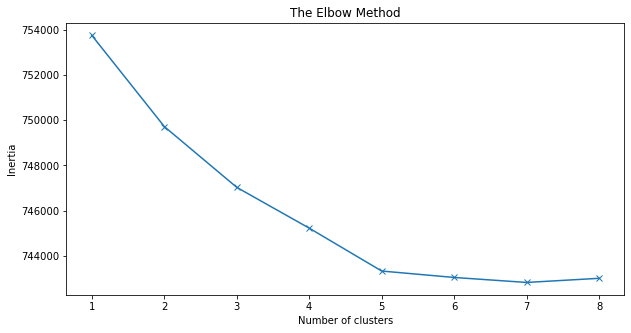

In [7]:
#plot our inertia
plt.figure(figsize=(10,5))
plt.plot(range(1,9),inertia,marker='x')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [8]:
#min max normalizer to calculate difference curve
def normalizer(a):
    """return the normalized input array"""
    return (a - min(a)) / (max(a) - min(a))
    

In [9]:
#normalize inertia 
x_k_normalized=normalizer(x_k)
y_normalized=normalizer(inertia)
y_normalized=max(y_normalized)-y_normalized


In [10]:
#calculate the difference curve
y_difference = y_normalized - x_k_normalized
x_difference = x_k_normalized.copy()

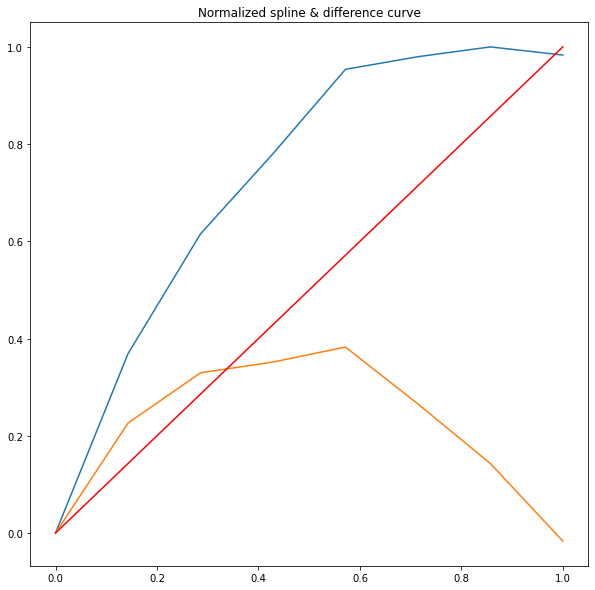

In [11]:
plt.figure(figsize=(10,10))
plt.title("Normalized spline & difference curve");
plt.plot(x_k_normalized, y_normalized)
plt.plot(x_difference, y_difference)
plt.plot(x_difference,x_difference,color='r')

In [12]:
#find the maxima indice
maxima_indices = np.argmax(y_difference)
x_difference_maxima = x_k[maxima_indices]
y_difference_maxima = y_difference[maxima_indices]
'''
using the maxima indice we can find the number of clusters that gives us the maxima, which is the elbow point
we find that it is 5 
'''
x_difference_maxima

5

In [13]:
K=x_difference_maxima #we choode the maxima point, which is the elbow, as our number of clusters
P = kmeans(X ,K) 

# cluster of the train dataset
clusters = P.predict() 

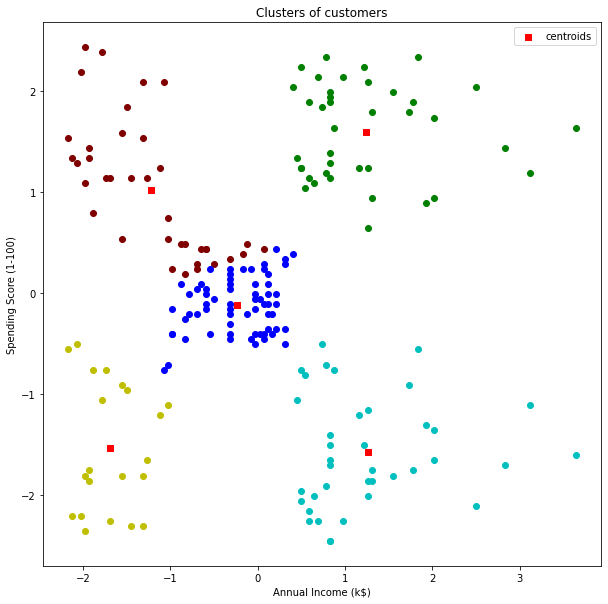

In [14]:
plt.figure(figsize=(10,10))
X=normalize(X)
plt.scatter(X[clusters == 0, 0], X[clusters == 0, 1],color='maroon')
plt.scatter(X[clusters == 1, 0], X[clusters == 1, 1],color='g')
plt.scatter(X[clusters == 2, 0], X[clusters == 2, 1],color='b')
plt.scatter(X[clusters == 3, 0], X[clusters == 3, 1],color='y')
plt.scatter(X[clusters == 4, 0], X[clusters == 4, 1],color='c')
plt.scatter(P.centroids[:,0],P.centroids[:,1],color='r',marker=',',label='centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()